
## Home Loan Default Prediction Project

## Scenario:  

EasyCredit Financial Services is a company that specializes in providing home loans to a wide demographic of customers. In recent years, EasyCredit has experienced a higher-than-average default rate on their home loans, which has affected its profitability and market reputation. To mitigate this issue, the company has decided to initiate a project to develop a deep learning model that can predict the probability of a loan applicant defaulting on a home loan. The company aims to integrate this predictive model into its loan approval process to make more informed decisions and reduce the risk of defaults.

## Problem Statement:

Construct a deep learning model to predict the likelihood of default for future loan applications using historical loan data.  

## Objective:

Develop a predictive model that determines whether loan applicants will be able to repay a loan, based on historical data.

## Detailed Directions:



1. Import the Required Libraries:
	- Essential libraries for data manipulation (NumPy, Pandas)

	- PyMySQL for database connectivity (if needed)

	- LabelEncoder for data preprocessing

	- Matplotlib for visualization


2. Load the Data:

	- Load the data from the loan_data.csv file into a Pandas DataFrame.

	- Examine the first few rows to understand the dataset's structure.


3. Check for Null Values:

	- Identify and handle any missing values in the dataset.


4. Analyze Data Column Distribution:

	- Use descriptive statistics and visualizations to understand the data distribution.


5. Balance the Data:

	- Address the imbalance in the dataset to ensure the model doesn't become biased.


6. Encode the Full Dataset:

	- Convert categorical variables into a form that could be provided to ML algorithms to do a better job in prediction.


7. Split and Train the Dataset:

	- Divide the data into training and testing sets.

	- Build and train the deep learning model on the training set.


8. Perform Feature Scaling:

	- Scale the features to standardize the range of independent variables.


9. Compile the Model:

	- Set up the deep learning model with the appropriate loss function and optimizer.


10. Fit the Model:

	- Train the model with the training data and validate it using the validation set.


11. Print the Model:

	- Output the details of the model architecture.


12. Evaluate the Metrics:

	- Calculate and interpret performance metrics, such as the confusion matrix, sensitivity, and area under the ROC curve (AUC).


### Installation of PyMySQL and Sklearn-Pandas
- Execute the command **!pip install pymysql** to install the PyMySQL package with Python's pip package manager.
- Use the command **!pip install sklearn-pandas** to install the Sklearn-Pandas package with Python's pip package manager.

In [ ]:
!pip install pymysql

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
!pip install sklearn-pandas

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


### Step 1: Importing the Required Library
- Import the essential libraries for data manipulation and analysis, such as NumPy and Pandas, and use PyMySQL for database connectivity, LabelEncoder for data preprocessing, and Matplotlib for visualization.

In [ ]:
import numpy as np
import pandas as pd
import pymysql
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

### Step 2: Loading the Data
- Load a CSV file named **loan_data.csv** into a Pandas DataFrame named **app_train**.
- Display the initial few rows of the **app_train** DataFrame.

In [ ]:
app_train = pd.read_csv('loan_data.csv')

In [ ]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Step 3: Checking for Null Values
- Determine if there are any null values in the **TARGET** column of the **app_train** DataFrame.
- The command **app_train['TARGET'].value_counts()** gives the count of each unique value in the **TARGET** column of the **app_train** DataFrame.

In [ ]:
bool_series = pd.isnull(app_train['TARGET'])
null_value_count = bool_series.sum()
fitered_data = app_train[bool_series]
print("Count of null in the 'TARGET' column:", null_value_count)


# Check if there are any missing values in the 'TARGET' column of the app_train DataFrame

Count of null in the 'TARGET' column: 0


In [ ]:
# Count the occurrences of each unique value in the 'TARGET' column of the app_train DataFrame
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

### Step 4: Analyzing the Data Column Distribution
- Utilize the Seaborn library to generate a **countplot**, a bar plot that illustrates the frequency of each category in the TARGET column.
- This plot displays two categories: Payer and Defaulter, signifying the target variable. The height of the bars indicates the count of each category, denoting the number of occurrences of payers and defaulters in the dataset.

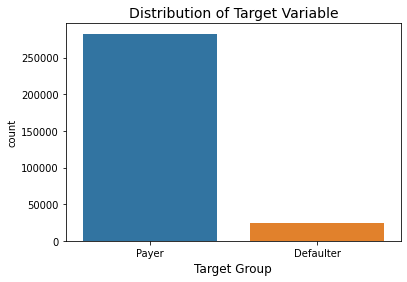

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x = 'TARGET', data = app_train)
plt.xticks([0,1], ['Payer', 'Defaulter'])
plt.xlabel('Target Group', fontsize=12)
plt.title('Distribution of Target Variable', fontsize=14)
plt.show()


# Visualize the distribution of values in the 'TARGET' column using a seaborn countplot
# Set custom x-axis labels for better interpretation ('Payer' for 0, 'Defaulter' for 1)
# Adjust x-axis label size for better readability

### Percentage of Defaulters to Payers
- Calculate the percentage of defaulters in the dataset by dividing the number of data points with **TARGET** value of 1 (defaulters) by the number of data points with **TARGET** value of 0 (non-defaulters) and then multiplying by 100

In [ ]:
num_defaulters = app_train['TARGET'].value_counts()[1]
num_non_defaulters = app_train['TARGET'].value_counts()[0]
percentage_of_defaulters = (num_defaulters / num_non_defaulters)*100
print("Percentage of defaulters:", percentage_of_defaulters, "%")

# Calculate the percentage of defaulters (TARGET=1) relative to non-defaulters (TARGET=0) in the app_train DataFrame

Percentage of defaulters: 8.781828601345662 %


### Step 5: Balancing the Data
- Upsample the fraud instances in the dataset by randomly duplicating them to increase their quantity. This step balances the data since fraud is a minority class compared to the **not_fraud** class.
- By setting **replace=True**, the resampling allows for the same fraud instances to be selected multiple times, ensuring that the number of fraud instances matches the number of **not_fraud** instances.
- Set the **random_state** parameter to ensure consistent and reproducible results.
- Use resampling with replacement to create an upsampled version of the fraud data, matching the number of instances in the majority class.
- Combine the original majority class instances (**not_fraud**) with the upsampled fraud instances (**fraud_upsampled**) to create a balanced dataset.
- Display the count of each target class (0 and 1) in the upsampled dataset.

In [ ]:
from sklearn.utils import resample

app_train_majority = app_train[app_train['TARGET'] == 0]
app_train_minority = app_train[app_train['TARGET'] == 1]

app_train_minority_unsampled = resample(app_train_minority,
                               replace=True,
                               n_samples=len(app_train_majority),
                               random_state=123)
app_train_unsampled = pd.concat([app_train_majority, app_train_minority_unsampled])
print(app_train_unsampled['TARGET'].value_counts())



# Import the resample function from sklearn.utils for handling class imbalance
# Extract the subset of the DataFrame where the target variable 'TARGET' is 0 (not fraud)
# Extract the subset of the DataFrame where the target variable 'TARGET' is 1 (fraud)
# Use the resample function to upsample the minority class (fraud) by generating additional samples
 # Sample with replacement to create additional instances
    # Match the number of samples in the majority class (not fraud)
    # Set a random seed for reproducibility of results



0    282686
1    282686
Name: TARGET, dtype: int64


In [ ]:
fraud = app_train_minority
not_fraud = app_train_majority

fraud_upsampled = resample(fraud,
                           replace=True,
                           n_samples=len(not_fraud),
                           random_state=27)
app_train_upsampled = pd.concat([not_fraud, fraud_upsampled])


# Use the resample function from sklearn.utils to upsample the minority class (fraud)
# 'fraud' is the DataFrame containing instances where the target variable 'TARGET' is 1
# replace=True specifies that sampling should be done with replacement
# This means that the same instance of fraud may be selected multiple times during upsampling
    # n_samples sets the number of samples to generate for the minority class
    # It is set to the length of the majority class (not fraud) to balance the class distribution
    # random_state is used to ensure reproducibility of results
    # Setting a specific random seed (e.g., 27) ensures the same results are obtained if the code is run again

In [ ]:
upsampled = pd.concat([not_fraud, fraud_upsampled])

In [ ]:
upsampled.TARGET.value_counts()

0    282686
1    282686
Name: TARGET, dtype: int64

In [ ]:
upsampled.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


### Plotting the Balanced Data
- Create a countplot using the upsampled dataset to display the distribution of the TARGET variable. The x-axis represents the TARGET categories, labeled as Payer and Defaulter, while the y-axis represents the count of occurrences.


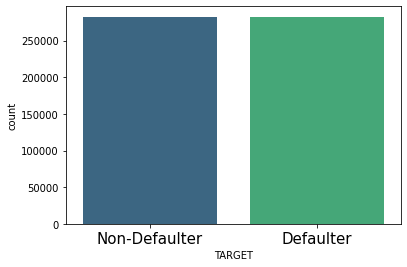

In [ ]:
fig, ax = plt.subplots()
sns.countplot(x = 'TARGET', data=upsampled, palette='viridis', ax=ax)
ax.set_xticklabels(['Non-Defaulter', 'Defaulter'])
ax.tick_params(axis='x', labelsize=15)
plt.show()



# Create a new figure and axis using matplotlib's subplots function
# This allows for customization and control over the layout of the plot
# Use seaborn's countplot to create a bar plot of the 'TARGET' variable in the upsampled DataFrame
# 'upsampled' is assumed to be the DataFrame containing the upsampled data
# 'x='TARGET'' specifies the variable to be plotted on the x-axis
# 'palette='viridis'' sets the color palette of the plot
# Set custom x-axis labels for better interpretation of the plot
# Customize x-axis tick parameters, specifically setting the label size to 15 for better readability
# Display the plot

### Step 6: Encoding (Label and One-Hot) of the Full Dataset
- Use a **LabelEncoder** object from the scikit-learn library to perform label encoding on categorical columns.
- Iterate through each column in the dataset, check if it is of object data type and if it has two or fewer unique categories. If these conditions are met, transform the column values using the label encoder, and assign the transformed values back to the column in the dataset.
- Keep track of the number of columns that were label encoded and print the count at the end.
- Perform one-hot encoding on the upsampled dataset and print its shape.

In [ ]:
from sklearn.preprocessing import LabelEncoder

Label_encoder_count=0

for col in upsampled.columns:
    if upsampled[col].dtype == 'object' and upsampled[col].nunique() <=2:
        le = LabelEncoder()
        upsampled[col] = le.fit_transform(upsampled[col])
        Label_encoder_count += 1
print(f"Total number of columns label encoded: {Label_encoder_count}")


# Create a label encoder object using scikit-learn's LabelEncoder
# Initialize a counter variable to keep track of the number of columns that are label encoded
# Iterate through the columns of the 'upsampled' DataFrame
    # Check if the data type of the column is 'object'
        # Check if the column has 2 or fewer unique categories
            # Fit the label encoder on the training data in the current column
            # Transform both the training and testing data in the current column
            # Increment the label encoder count
# Print the total number of columns that were label encoded

Total number of columns label encoded: 4


In [ ]:
upsampled_encoded = pd.get_dummies(upsampled, drop_first=True)
print(upsampled_encoded.shape)


# Use pandas get_dummies function to one-hot encode categorical variables in the 'upsampled' DataFrame
# One-hot encoding is a technique to represent categorical variables as binary vectors
# Each category is transformed into a new binary column, and each observation is marked with a 1 or 0 for the presence or absence of the category
# Print the shape of the 'upsampled' DataFrame to show the number of columns after one-hot encoding

### Step 7: Splitting and Training the Dataset
- Import the **train_test_split** function from the **sklearn.model_selection** module, used to split the dataset into training and testing sets.
- Split the features and target data into training and testing sets using the **train_test_split** function, with a test size of 20% and a random state of 10.
- Assign the resulting training and testing sets to features_train, **features_test**, **target_train**, and **target_test**, respectively.


In [ ]:
from sklearn.model_selection import train_test_split

x = upsampled.drop('TARGET', axis=1)
y = upsampled['TARGET']

class_names = upsampled['TARGET']
features_train, features_test, target_train, target_test = train_test_split(x,y, test_size=0.20, random_state=10)

# Import the train_test_split function from scikit-learn to split the data into training and testing sets
# Extract features from the upsampled DataFrame, excluding the 'TARGET' column
# Extract the target variable 'TARGET' from the upsampled DataFrame
# Create a variable 'class_names' that holds the 'TARGET' column of the upsampled DataFrame
# This is often used in classification tasks for labeling classes
# Use train_test_split to split the data into training and testing sets
# features_train and target_train represent the training set, while features_test and target_test represent the testing set
# test_size=0.20 specifies that 20% of the data will be used for testing, and random_state=10 ensures reproducibility

In [ ]:
features_train.shape,features_test.shape, target_train.shape, target_test.shape

### Handling Missing Values and Imputing Data


- Fill the missing values in the **features_train** DataFrame using the median of each column.
- Identify the categorical columns that have missing values and store them in the **list_categorical** list.
- For each categorical column in **features_train** with missing values, apply the **SimpleImputer** with the strategy of filling the missing values with the most frequent value.
- Repeat the same process for the **features_test** DataFrame.
- Fill the upsampled DataFrame with the median values from the **app_train** DataFrame using the **fillna()** method.
- Lastly, check if there are any remaining missing values in the upsampled DataFrame and display the first few rows of the DataFrame.

In [ ]:
features_train=features_train.fillna(features_train.median())

/tmp/ipykernel_205/219432824.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  features_train=features_train.fillna(features_train.median())


In [ ]:
# Import SimpleImputer from scikit-learn to handle missing values
from sklearn.impute import SimpleImputer
# Initialize an empty list to store column names of categorical variables with missing values
list_categorical = []
# Iterate through the columns of the training features
    # Check if the column is of type 'object' and contains any missing values
        # Append the column name to the list
list_categorical.append(col)

for col in list_categorical:
    imputer = SimpleImputer(strategy='most_frequent')
    upsampled[col] = imputer.fit_transform(upsampled[col].values.reshape(-1,1))


        # Iterate through the list of categorical columns with missing values
    # Create a SimpleImputer object with the strategy of replacing missing values with the most frequent value

    # Apply the imputer to fill missing values in the current column
    # The reshape(-1, 1) is used to convert the 1D array into a 2D array, as SimpleImputer expects a 2D input

In [ ]:
features_test=features_test.fillna(features_test.median())

/tmp/ipykernel_205/1654468904.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  features_test=features_test.fillna(features_test.median())


In [ ]:
# Import SimpleImputer from scikit-learn to handle missing values
from sklearn.impute import SimpleImputer

# Initialize an empty list to store column names of categorical variables with missing values
list_categorical = []

# Iterate through the columns of the testing features
for col in features_test:
    # Check if the column is of type 'object' and contains any missing values
    if features_test[col].dtype == 'object' and features_test[col].isnull().values.any():
        # Append the column name to the list
        list_categorical.append(col)

# Iterate through the list of categorical columns with missing values
for col in list_categorical:
    # Create a SimpleImputer object with the strategy of replacing missing values with the most frequent value
    imputer = SimpleImputer(strategy='most_frequent')

#TODO
features_test[col] = imputer.fit_transform(features_test[[col]])
    # Apply the imputer to fill missing values in the current column
    # The double square brackets ([[col]]) are used to pass a DataFrame with a single column to SimpleImputer,
    # as it expects a 2D input

In [ ]:
upsampled.fillna(app_train.median(), inplace=True)

/tmp/ipykernel_205/1304145824.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  upsampled.fillna(app_train.median(), inplace=True)


In [ ]:
upsampled.isnull().values.any()

True

In [ ]:
upsampled.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,0,M,0,1,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


- Split the features and target variables into training and testing datasets using the **train_test_split** function from **sklearn.model_selection** module.


In [ ]:
# Import the train_test_split function from scikit-learn to split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Extract features from the 'upsampled' DataFrame, excluding the 'TARGET' column
features = upsampled.drop(['TARGET'], axis=1)

# Extract the target variable 'TARGET' from the 'upsampled' DataFrame
target = upsampled.TARGET

# Create a variable 'class_names' that holds the 'TARGET' column of the 'upsampled' DataFrame
# This is often used in classification tasks for labeling classes
class_names = upsampled.TARGET

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.20, random_state=10)
# Use train_test_split to split the data into training and testing sets
# features_train and target_train represent the training set, while features_test and target_test will represent the testing set
# test_size=0.20 will specify that 20% of the data will be used for testing, and random_state=10 ensures reproducibility

In [ ]:
features_train.shape,features_test.shape, target_train.shape, target_test.shape

((452297, 121), (113075, 121), (452297,), (113075,))

### Step 8: Performing Feature Scaling on the Dataset
- Perform feature scaling using **MinMaxScaler** on the training features, and store the scaled features in **features_train_scaled**.

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

2024-11-22 20:35:24.585281: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-22 20:35:25.229608: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


VOC-NOTICE: GPU memory for this assignment is capped at 1024MiB


2024-11-22 20:35:30.901224: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [ ]:
features_train = features_train.values
target_train = target_train.values
features_test = features_test.values
target_test = target_test.values

print(features_train.unique())
# Convert the training features to a NumPy array
# Convert the training target variable to a NumPy array
# Convert the testing features to a NumPy array
# Convert the testing target variable to a NumPy array

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

features_train_scaled = scaler.fit_transform(features_train.reshape(-1,1))
target_test_scaled = scaler.fit_transform(target_test.reshape(-1,1))

# Import the MinMaxScaler from scikit-learn to scale the features to a specified range (default is [0, 1])
# Create an instance of the MinMaxScaler
# Use the fit_transform method of the scaler to fit the scaling parameters on the training features and transform them
# Use the transform method of the scaler to apply the same scaling parameters to the testing features

ValueError: could not convert string to float: 'F'

In [ ]:
target_train.shape

Deep Neural Network with 4 Layers

- The network includes 4 layers with 2 hidden layers, each containing 80 neurons.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(80, activation='relu', input_dim=242))
model.add(Dropout(0.2))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


# Import the Sequential class from the Keras library to create a sequential model
# Create an instance of the Sequential model
# Add a dense (fully connected) layer with 80 neurons, input dimension of 242, and ReLU activation function
# Add a dropout layer with a dropout rate of 0.2 to reduce overfitting during training
# Add another dense layer with 80 neurons and ReLU activation function
# Add another dropout layer with a dropout rate of 0.2
# Add a final dense layer with 1 neuron and a sigmoid activation function for binary classification

### Step 9: Compiling the Model
- Compile the model with the Adam optimizer, binary cross-entropy loss function, and accuracy as the metric.

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Compile the model with specific configuration for training
# The 'Adam' optimizer, 'binary_crossentropy' loss function, and 'accuracy' metric are commonly used for binary classification tasks

# Set the optimizer to 'Adam', which is a popular optimization algorithm
              # Set the loss function to 'binary_crossentropy'
              # This is the appropriate loss function for binary classification problems
              # Specify the metric(s) to be used for evaluation during training
              # 'accuracy' is a common metric for classification problems

### Step 10: Fitting the Model
- Fit the model to the training data, with a specified number of epochs (50), to train the model and optimize its parameters based on the provided input features and target values.



In [ ]:
model.fit(target_train_scaled, features_train, epochs=5)


# Train the neural network model using the training features and target variables
# The model will be trained for 5 epochs

# Use the fit method to train the model
# Provide the scaled training features as input and the corresponding target values for supervised learning
# The 'epochs' parameter specifies the number of times the entire training dataset will be passed forward and backward through the neural network

### Step 11: Printing the Model Summary
- Use the model.summary() function to display a summary of the model architecture, including the number of parameters and the shape of each layer.


In [ ]:
model.summary()

### Step 12: Evaluating the Metrics
- Use the evaluate function to calculate the loss and accuracy of the trained model on the test data.
The **test_loss** and **test_acc** variables store the values of the calculated loss and accuracy, respectively. Then, print the test accuracy value.

In [ ]:
test_loss, test_acc = model.evaluate(target_test_scaled, features_test)


# Evaluate the trained model on the testing dataset and print the test accuracy

# Use the evaluate method to assess the model's performance on the testing dataset
# Provide the scaled testing features and their corresponding target values as input
# The method returns the test loss and test accuracy

# Print the test accuracy obtained from the evaluation
print('Test accuracy:', test_acc)

- Use the **predictions = model.predict(features_test_scaled**) code to make predictions on the test data using the trained model.
- Apply the trained model to the scaled features of the test data and obtain the predicted values for the target variable.

In [ ]:
y_pred_prob = model.predict(features_test_scaled)


# Obtain predictions from the trained model on the scaled testing features

# Use the predict method to generate predictions from the trained model
# Provide the scaled testing features as input, and the method returns the predicted probabilities for each instance

NameError: name 'features_test_scaled' is not defined

- Use the **accuracy_score** function from the **sklearn.metrics** module to calculate the accuracy of the predicted values compared to the actual target values.

In [ ]:
# Import the accuracy_score function from scikit-learn to calculate classification accuracy
from sklearn.metrics import accuracy_score

y_pred = (y_pred_prob >=0.5).astype(int)
accuracy = accuracy_score(features_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the classification accuracy by comparing the true target values (target_test) with the rounded predictions
# The predictions are rounded to convert probabilities to binary predictions (0 or 1)
# This is suitable for binary classification tasks

NameError: name 'y_pred_prob' is not defined

In [ ]:
# Import the confusion_matrix function from scikit-learn to compute the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(features_test, y_pred)
print(cm)

# Compute the confusion matrix by comparing the true target values (target_test) with the rounded predictions
# The predictions are rounded to convert probabilities to binary predictions (0 or 1)
# The confusion matrix provides information on true positive, true negative, false positive, and false negative counts


# Print the computed confusion matrix
cnf_matrix

NameError: name 'cnf_matrix' is not defined

In [ ]:
#TODO
# Extract the elements of the confusion matrix to obtain true negative (TN), false positive (FP), false negative (FN), and true positive (TP) counts

# Use the confusion_matrix function to compute the confusion matrix by comparing the true target values (target_test)
# with the rounded predictions. The predictions are rounded to convert probabilities to binary predictions (0 or 1).

# Use the ravel() method to flatten the confusion matrix into a 1D array
# The resulting array has the order [TN, FP, FN, TP], where TN: true negative, FP: false positive, FN: false negative, TP: true positive

# Print or view the extracted counts of true negative, false positive, false negative, and true positive

Visualizing the Confusion Matrix

- Generate a heatmap representation of the confusion matrix, which is a visual way to analyze the performance of a classification model.
- Create the heatmap using the **sns.heatmap()** function from the seaborn library, with additional customization for labels, title, and tick marks to enhance the readability of the plot.

In [ ]:
# Import seaborn for data visualization and matplotlib.pyplot for creating plots
import seaborn as sns
import matplotlib.pyplot as plt

#TODO
# Create a subplot and visualize the confusion matrix using a heatmap with seaborn
# The heatmap will have annotations, and the color map is set to 'Blues'
# The 'fmt='g'' specifies the format for the annotations as general numeric format


# Set the labels, title, and ticks for better interpretation


# Set x-axis and y-axis tick labels to represent the classes ('0' and '1')


### Sensitivity, Recall, Hit rate, or True Positive Rate (TPR)

In [ ]:
#TODO
# Calculate Sensitivity (True Positive Rate or Recall) using the formula Sensitivity = TP / (TP + FN)
#TODO
# Calculate Sensitivity by dividing the count of true positives (TP) by the sum of true positives and false negatives (FN)


# Print or view the calculated Sensitivity
Sensitivity

### Area Under the Receiver Operating Characteristic Curve (ROC AUC)




In [ ]:
# Import the roc_auc_score function from scikit-learn to calculate the area under the Receiver Operating Characteristic (ROC) curve
from sklearn.metrics import roc_auc_score

#TODO
# Calculate the area under the ROC curve (AUC) by comparing the true target values (target_test) with the predicted probabilities
# The roc_auc_score function takes the true labels and predicted probabilities as input